# 1.Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

# 2.Import Data

In [2]:
Forest_fires=pd.read_csv('forestfires.csv')
Forest_fires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# 3.Data Understanding & EDA

In [3]:
Forest_fires.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [4]:
Forest_fires.shape

(517, 31)

In [5]:
Forest_fires.count()

month            517
day              517
FFMC             517
DMC              517
DC               517
ISI              517
temp             517
RH               517
wind             517
rain             517
area             517
dayfri           517
daymon           517
daysat           517
daysun           517
daythu           517
daytue           517
daywed           517
monthapr         517
monthaug         517
monthdec         517
monthfeb         517
monthjan         517
monthjul         517
monthjun         517
monthmar         517
monthmay         517
monthnov         517
monthoct         517
monthsep         517
size_category    517
dtype: int64

In [6]:
Forest_fires['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

#### We can see there is two classes in target(size category) column like small is benugn & Large will be our Malingnant

In [7]:
Forest_fires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
Forest_fires.duplicated().sum()

8

In [9]:
Forest_fires1=Forest_fires.drop_duplicates(inplace=False)

In [10]:
Forest_fires1.shape

(509, 31)

In [11]:
Forest_fires1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

##### From the above we can see that there is no Na values also,we can see that there is three variables are in the form of objective type data so,we've to convert into numerical form.

## Label Encoding to convert objective dattype to numerical

In [12]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [13]:
Forest_fires1['month']=label_encoder.fit_transform(Forest_fires1['month'])
Forest_fires1['day']=label_encoder.fit_transform(Forest_fires1['day'])
Forest_fires1['size_category']=label_encoder.fit_transform(Forest_fires1['size_category'])

In [14]:
Forest_fires1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [15]:
Forest_fires1.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1
516,9,5,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,1


# Distribution of classes

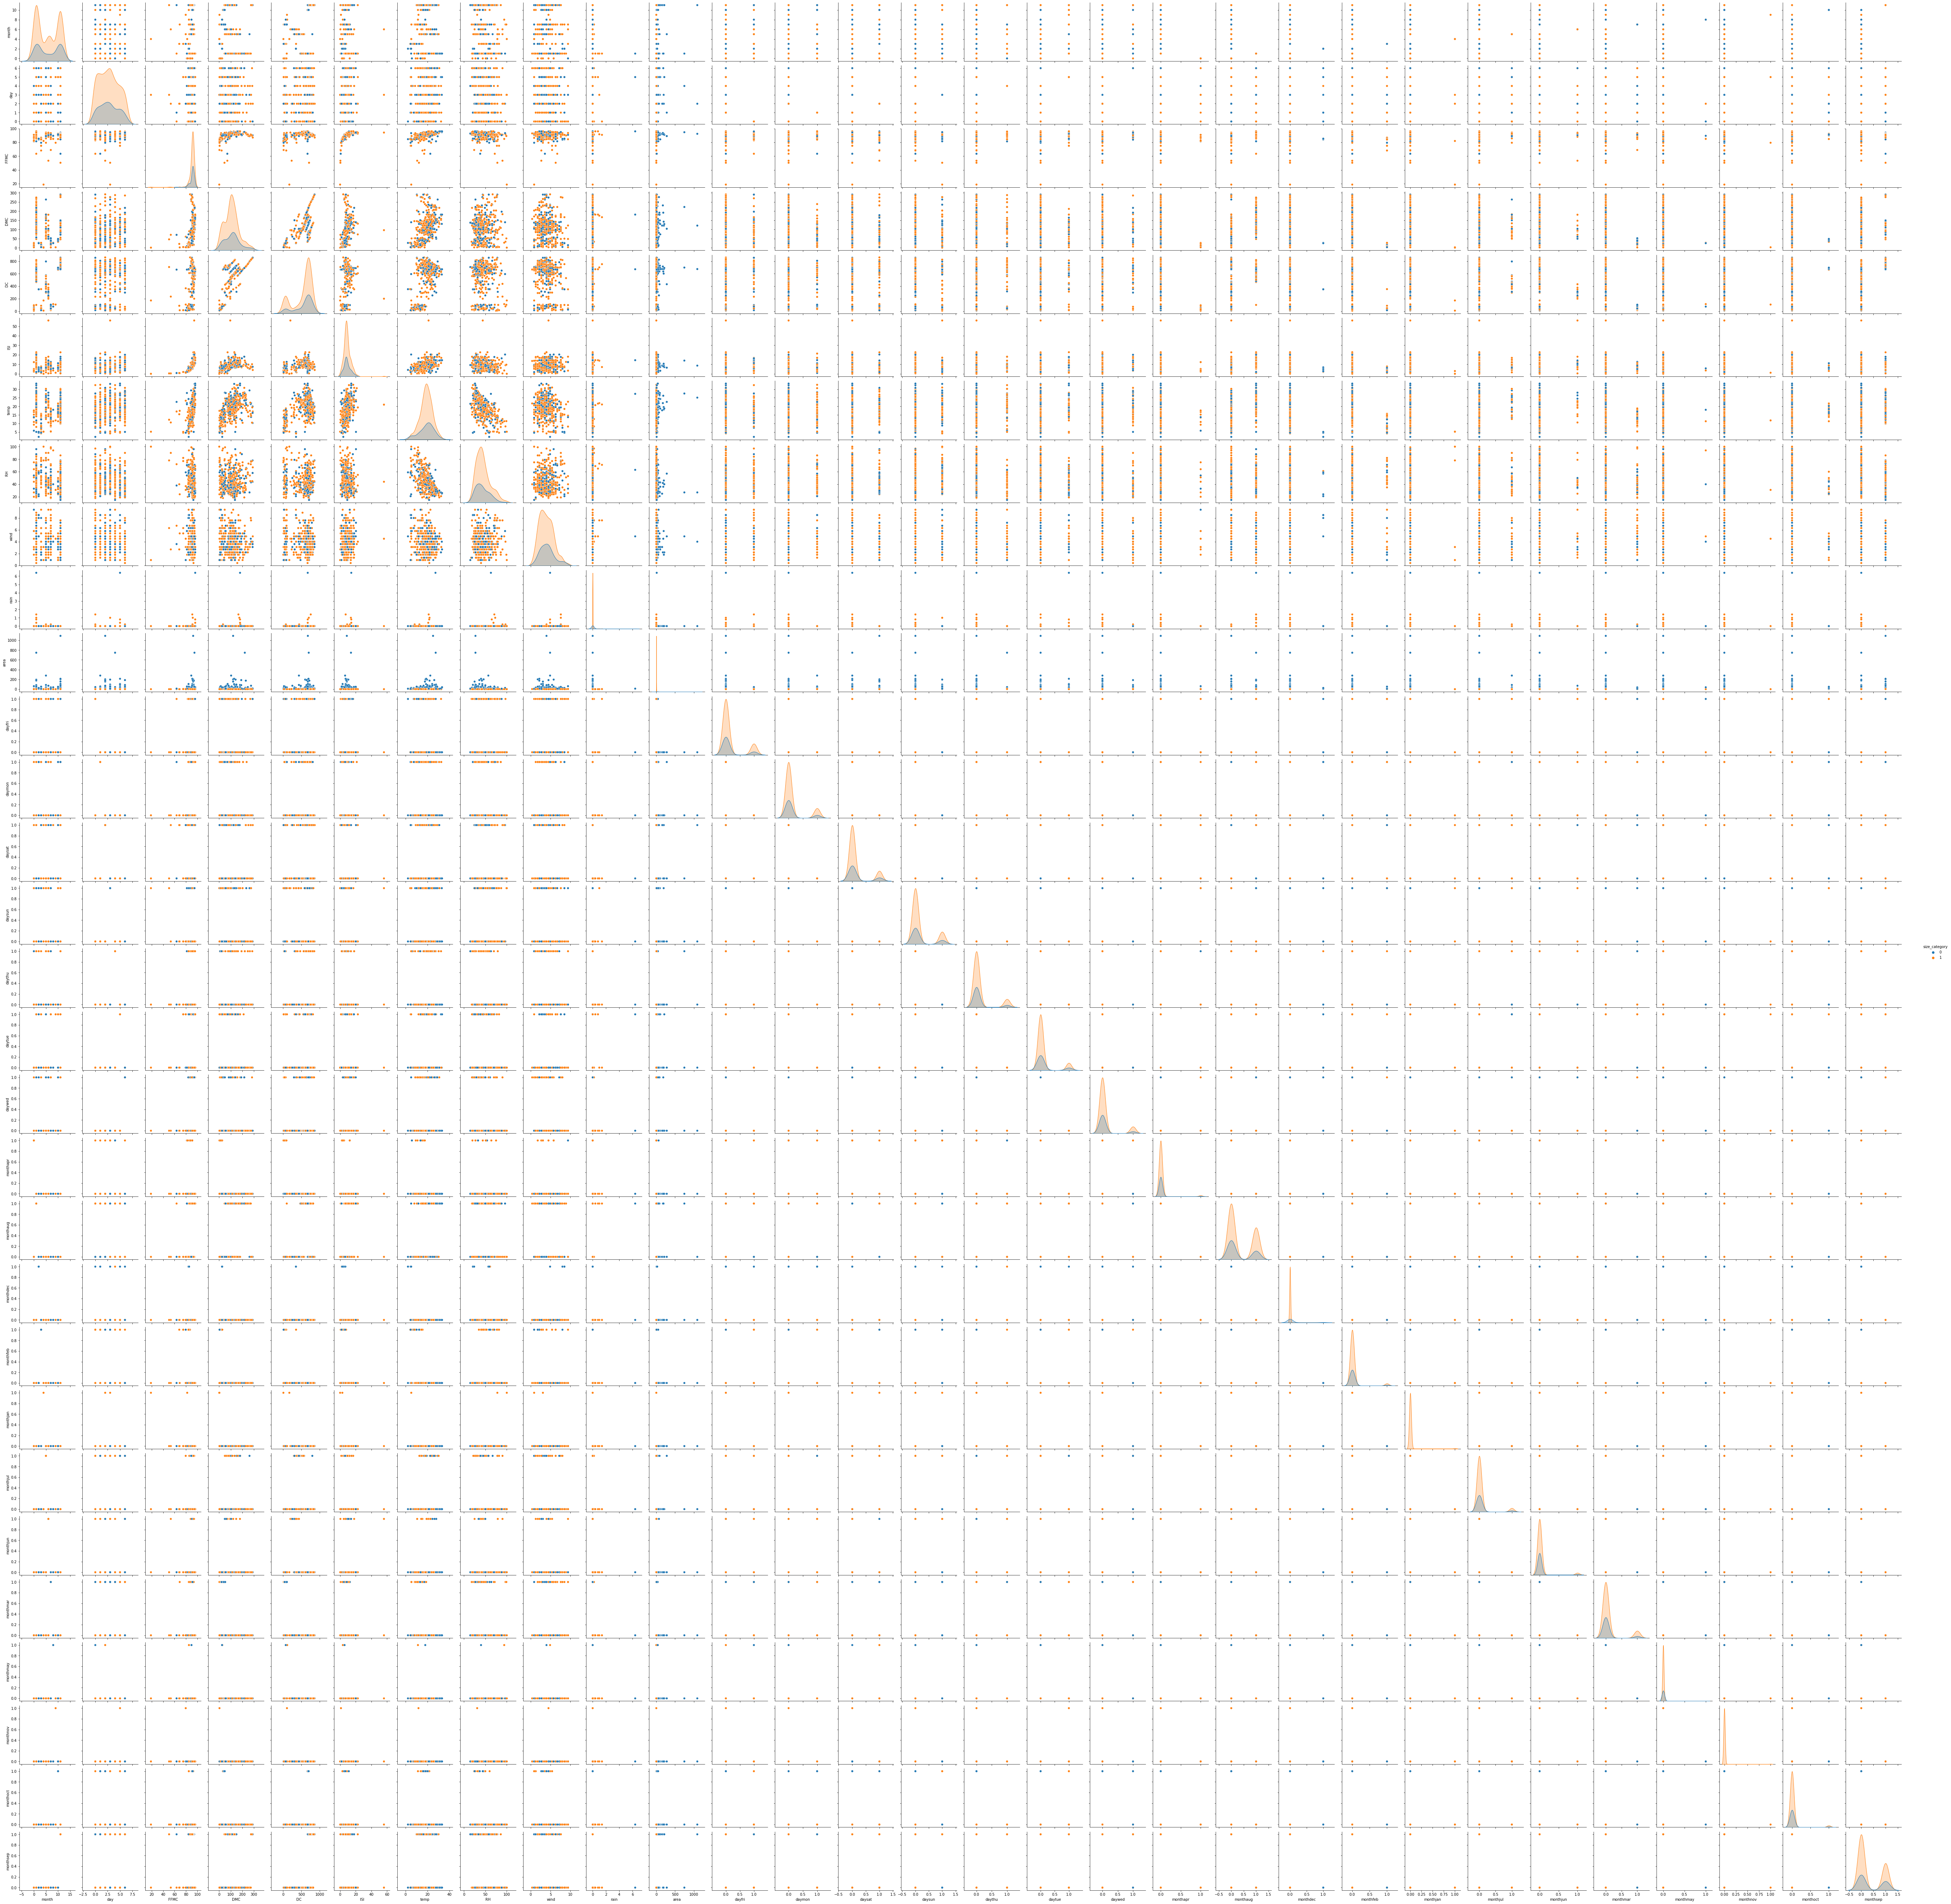

In [16]:
import seaborn as sns
sns.pairplot(data=Forest_fires1,hue='size_category')

### Correlation Between the Features `

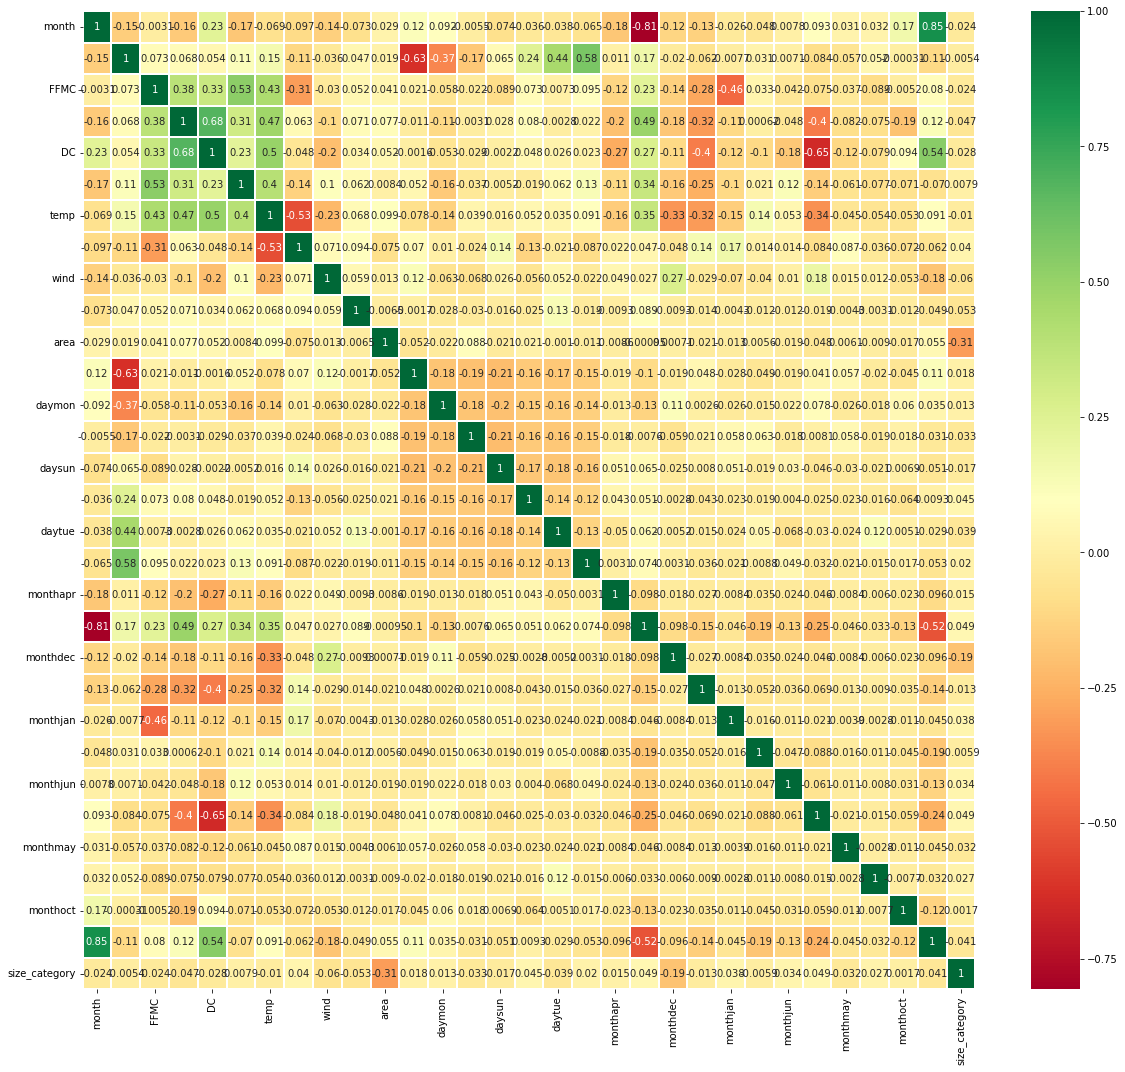

In [17]:
sns.heatmap(Forest_fires1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,18)
plt.show()

# Divide the data as Train/Test dataset


In [18]:
X=Forest_fires1.drop(['size_category'],axis=1)

y=Forest_fires1['size_category']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [20]:
X_train.shape,y_train.shape

((407, 30), (407,))

In [21]:
X_test.shape,y_test.shape

((102, 30), (102,))

In [22]:
X_train.dtypes

month         int32
day           int32
FFMC        float64
DMC         float64
DC          float64
ISI         float64
temp        float64
RH            int64
wind        float64
rain        float64
area        float64
dayfri        int64
daymon        int64
daysat        int64
daysun        int64
daythu        int64
daytue        int64
daywed        int64
monthapr      int64
monthaug      int64
monthdec      int64
monthfeb      int64
monthjan      int64
monthjul      int64
monthjun      int64
monthmar      int64
monthmay      int64
monthnov      int64
monthoct      int64
monthsep      int64
dtype: object

In [23]:
y_train.dtypes

dtype('int32')

# 4.Model Building & Training

### 4.1 Model Building using "rbf" Criteria

In [24]:
Model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
Model.fit(X_train,y_train)
y_Predited=Model.predict(X_test)

In [25]:
accuracy_score(y_test,y_Predited)

0.7647058823529411

### 4.2 Model Building using "linear" Criteria

In [26]:
Model_1=svm.SVC(kernel='linear',C=1,gamma='auto')
Model_1.fit(X_train,y_train)
y_Predited_1=Model_1.predict(X_test)

In [27]:
accuracy_score(y_test,y_Predited_1)

0.9901960784313726

### 4.3 Model Building using "poly" Criteria

In [28]:
Model_2=svm.SVC(kernel='poly',C=1,gamma=0.1)
Model_2.fit(X_train,y_train)
y_Predited_2=Model_2.predict(X_test)

In [29]:
accuracy_score(y_test,y_Predited_2)

0.9901960784313726

### Note:
### 1.Higher Value of 'C' means you'll get more accurate results
### 2.High value of 'gamma' means we are choosing closes points to the selected hyperplane.

# 5. Model Evalutaion

### 5.1 Consfusion Matrix 

##### To check type of error & Model Performance.it gives summary of correct & incorrect  predictions broken down by each category.

In [30]:
confusion_matrix(y_test,y_Predited)

array([[ 1, 24],
       [ 0, 77]], dtype=int64)

In [31]:
confusion_matrix(y_test,y_Predited_1)

array([[25,  0],
       [ 1, 76]], dtype=int64)

In [32]:
confusion_matrix(y_test,y_Predited_2)

array([[25,  0],
       [ 1, 76]], dtype=int64)

# 6.Ploting Confusion Matrix

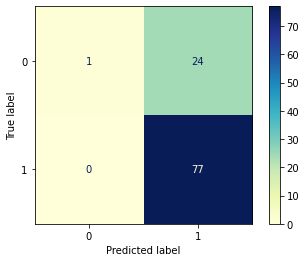

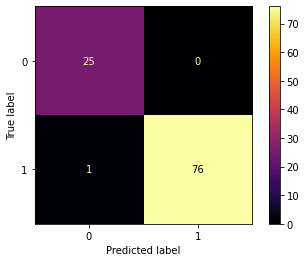

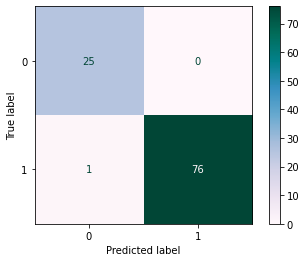

In [33]:
plot_confusion_matrix(Model,X_test,y_test,cmap="YlGnBu"),
plot_confusion_matrix(Model_1,X_test,y_test,cmap="inferno"),
plot_confusion_matrix(Model_2,X_test,y_test,cmap="PuBuGn")

# 7. Classification Report of Model

#### Classification Report of Kernal=Rbf

In [34]:
print(classification_report(y_test,y_Predited))

              precision    recall  f1-score   support

           0       1.00      0.04      0.08        25
           1       0.76      1.00      0.87        77

    accuracy                           0.76       102
   macro avg       0.88      0.52      0.47       102
weighted avg       0.82      0.76      0.67       102



#### Classification Report of Kernal=Linear

In [35]:
print(classification_report(y_test,y_Predited_1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.99      0.99        77

    accuracy                           0.99       102
   macro avg       0.98      0.99      0.99       102
weighted avg       0.99      0.99      0.99       102



#### Classification Report of Kernal=Poly

In [36]:
print(classification_report(y_test,y_Predited_2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.99      0.99        77

    accuracy                           0.99       102
   macro avg       0.98      0.99      0.99       102
weighted avg       0.99      0.99      0.99       102



**** From the above we've concluded that,the Model with kernal Linear & Poly
**** gives us better accuracy,precision.So,our model performing good